# Task - House Price Prediction

The **objective** of this project is to develop a **predictive model** that can **estimate the price of a house** based on various features such as square footage, number of bedrooms and bathrooms, location, condition, and other relevant attributes. The model will be trained using a dataset containing information about various houses and their corresponding prices. The goal is to develop a model that can accurately predict the price of a house based on the given features.


In [614]:
# Mounting the drive for uploading files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task 1: Reading and Understanding the Dataset

In [615]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [616]:
# Load & Read the dataset

# house = pd.read_csv('home_data.csv')

In [617]:
# Load & Read the dataset from the drive

house = pd.read_csv('/content/drive/MyDrive/6. Machine Learning/Assignment - Linear Regression/Assignment - Linear Regression/home_data.csv')

In [618]:
# Check the details of dataset for 1st 10 rows

house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## Task 2: Exploratory Data Analysis

**1. Check the distribution of the target variable.**

**2. Check the distribution of the important numerical features.**

**3. Check the distribution of the important categorical features.**

**4. Check the correlation between the numerical features and the target variable.**

**5. Check the correlation between the categorical features and the target variable.**


In [619]:
# Check the Rows and Columns of House dataframe

house.shape

(21613, 21)

In [620]:
# List all the columns on House Dataframe

house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [621]:
# Check for Null values

house.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [622]:
# Check for summary of House dataframe

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [623]:
# Check for any Duplicate Records

house.duplicated().sum()

np.int64(0)

In [624]:
# Check the statistical overview of numerical data

house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [625]:
# Check the statistical overview of categorical data

house.describe(include='object')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [626]:
# Check the Value count of Date column

house['date'].value_counts()

,count
date,
20140623T000000,142
20140626T000000,131
20140625T000000,131
20140708T000000,127
20150427T000000,126
...,...
20150131T000000,1
20150117T000000,1
20150308T000000,1


In [627]:
# Identifying Junk values in categorical column

for i in house.select_dtypes(include=['object']).columns:
    print(i, house[i].value_counts)

date <bound method IndexOpsMixin.value_counts of 0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object>


In [628]:
# Trim last 7 values from categorical column

house['date'] = house['date'].str[:-7]


In [629]:
# Check the Value count of Date column

house['date'].value_counts()

,count
date,
20140623,142
20140626,131
20140625,131
20140708,127
20150427,126
...,...
20150131,1
20150117,1
20150308,1


In [630]:
# Changing the date column from categorical to numerical

house['date'] = pd.to_datetime(house['date'])


In [631]:
# Check the data type of date column

house['date'].dtype

dtype('<M8[ns]')

In [632]:
# Check the statistical overview of numerical data

house.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [633]:
# Removing time from date column

house['date'] = house['date'].dt.date
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Univariate Analysis - Target column (Price)

Text(0.5, 0, 'Price')

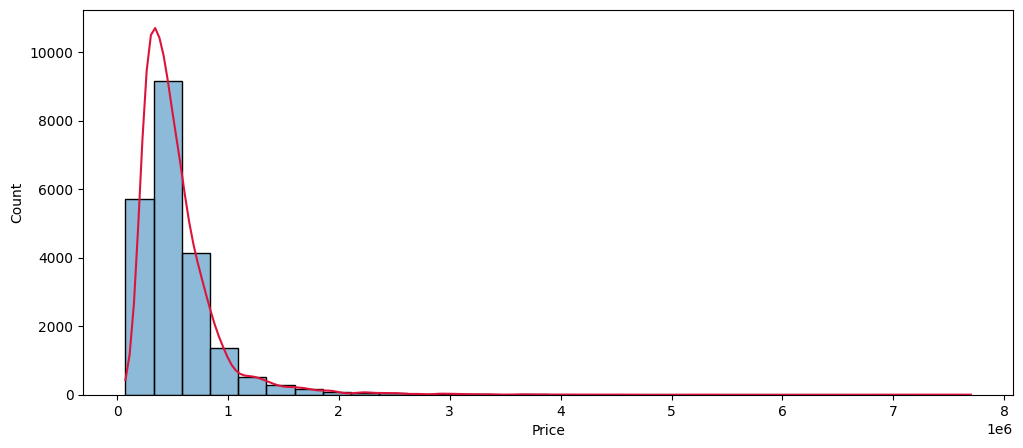

In [634]:
# Check the distribution of price column

plt.figure(figsize=(12, 5))
ax = sns.histplot(data=house, x='price', kde=True, bins = 30)
ax.lines[0].set_color('crimson')

plt.xlabel('Price')

### Univariate Analysis  - Features column

In [635]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

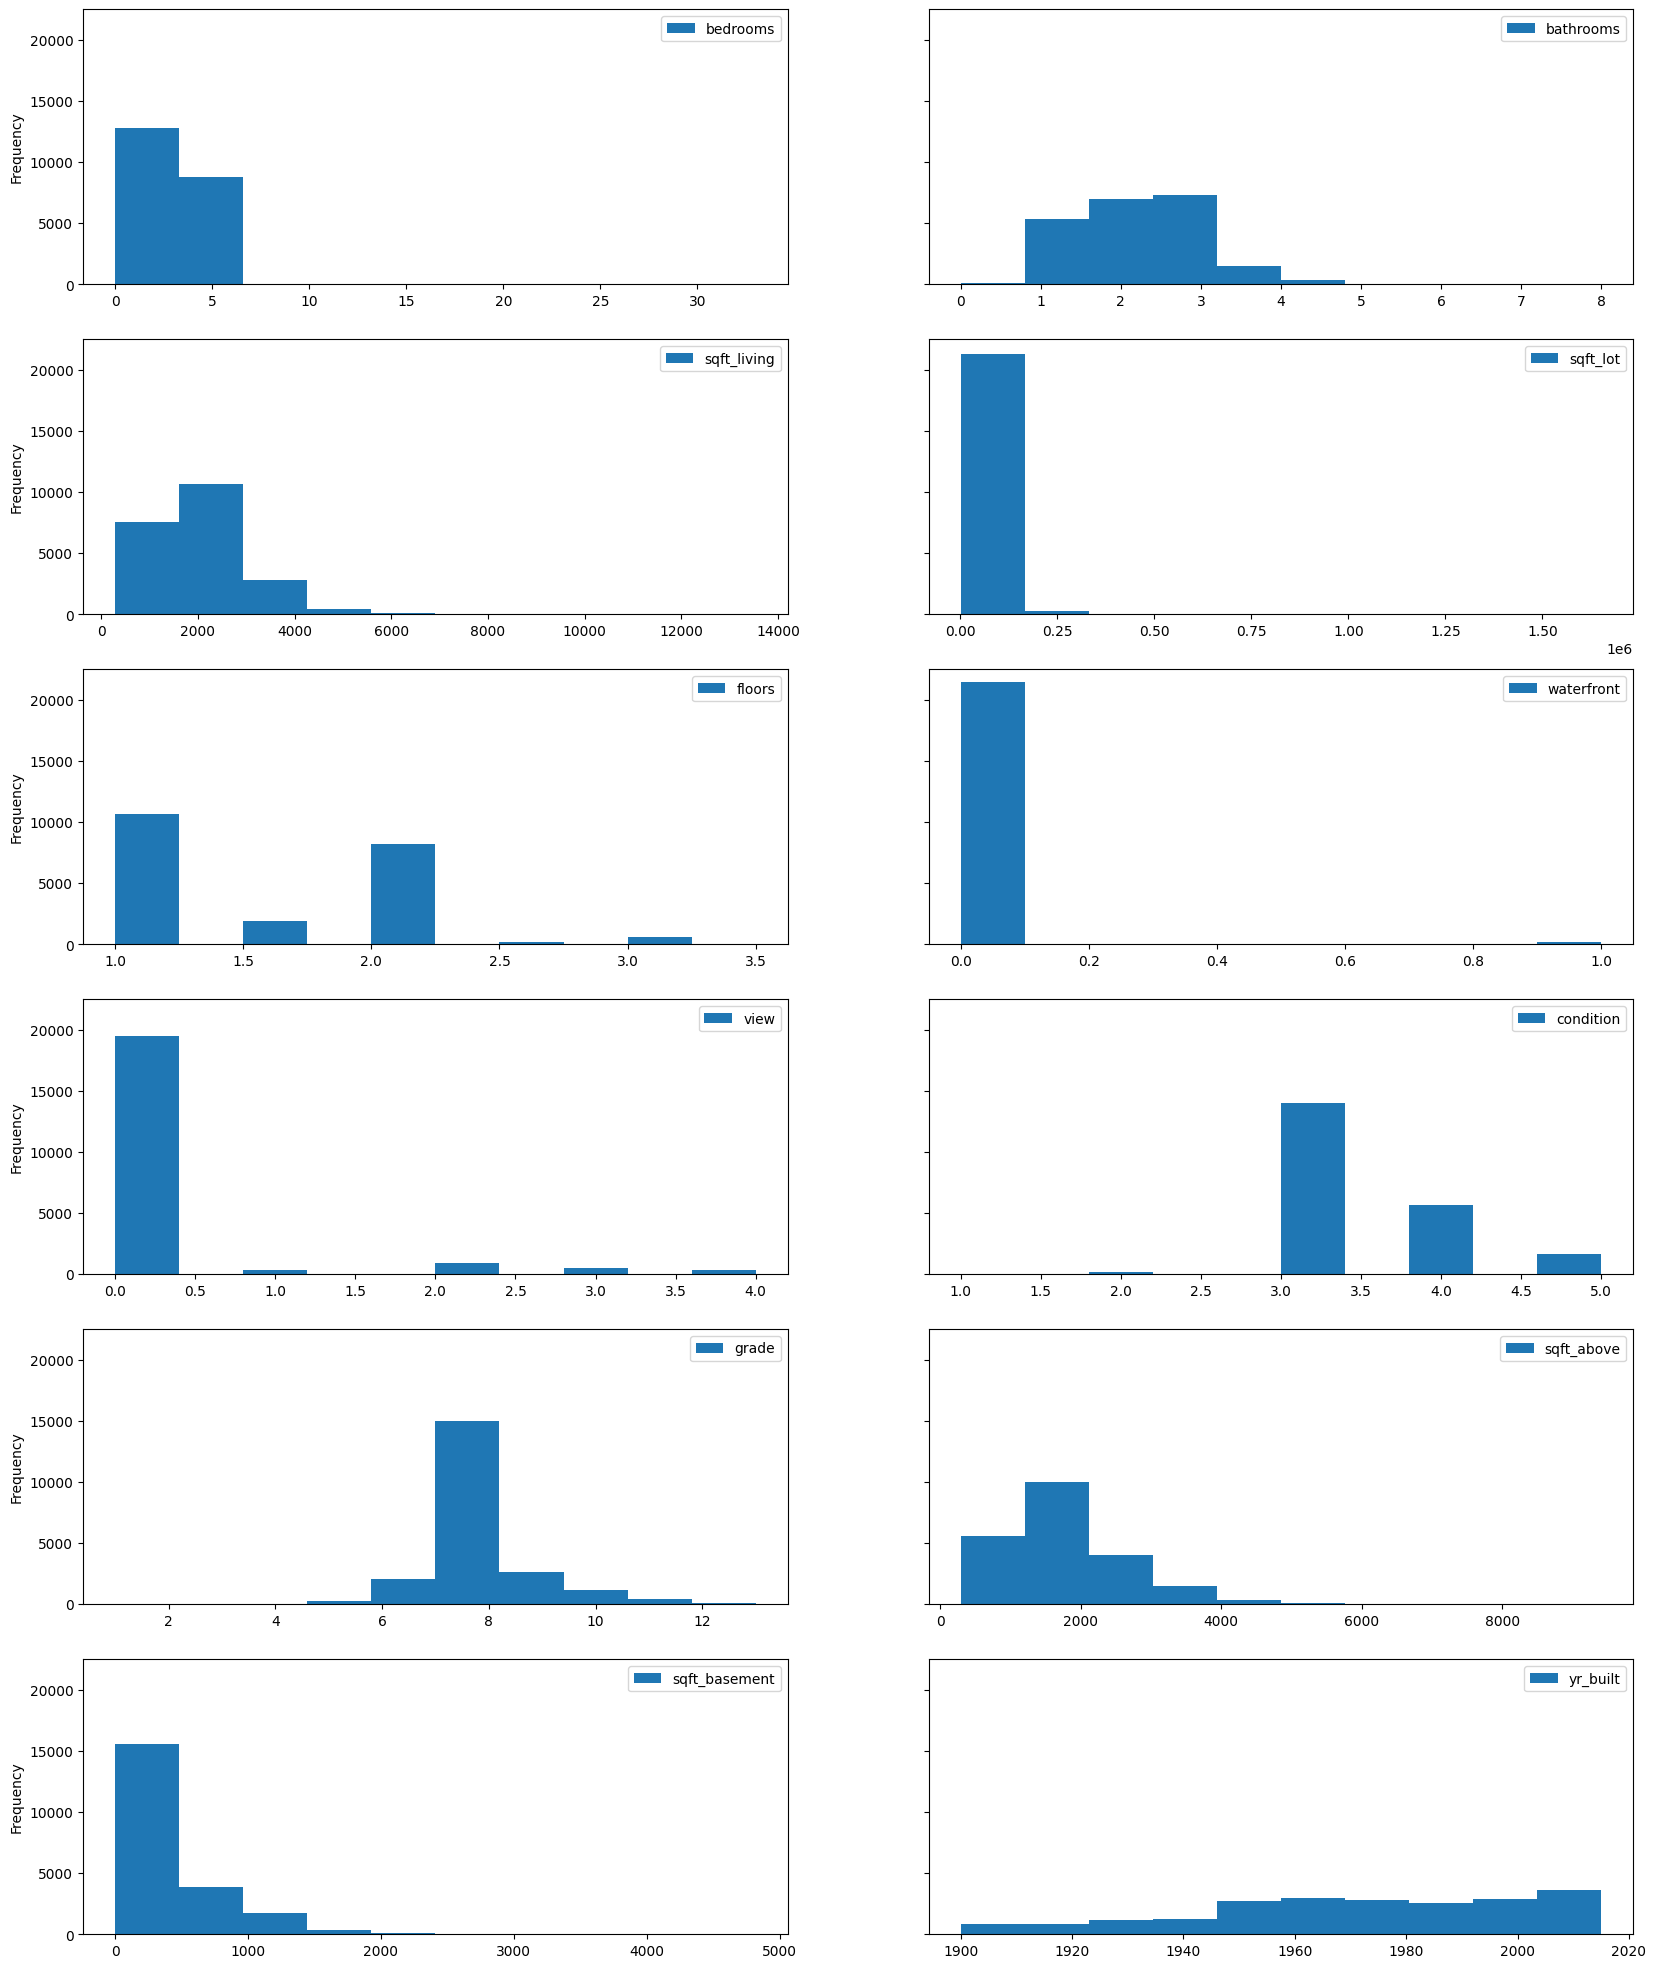

In [636]:
# plot the distribution of all columns in subplots

fig, axs = plt.subplots(6, 2, sharey=True)

house.plot(kind='hist', y='bedrooms', ax=axs[0,0], figsize=(20, 25))
house.plot(kind='hist', y='bathrooms', ax=axs[0,1])
house.plot(kind='hist', y='sqft_living', ax=axs[1,0])
house.plot(kind='hist', y='sqft_lot', ax=axs[1,1])
house.plot(kind='hist', y='floors', ax=axs[2,0])
house.plot(kind='hist', y='waterfront', ax=axs[2,1])
house.plot(kind='hist', y='view', ax=axs[3,0])
house.plot(kind='hist', y='condition', ax=axs[3,1])
house.plot(kind='hist', y='grade', ax=axs[4,0])
house.plot(kind='hist', y='sqft_above', ax=axs[4,1])
house.plot(kind='hist', y='sqft_basement', ax=axs[5,0])
house.plot(kind='hist', y='yr_built', ax=axs[5,1])

#plt.tight_layout()
plt.show()


In [637]:
# Saving the columns with data type having numbers to a new variable

num_cols = house.select_dtypes(include='number').columns
num_cols

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [638]:
# Dropping Irrelevant columns from num_cols to obtain target_cols

target_cols = num_cols.drop(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'])
target_cols

Index(['price'], dtype='object')

In [639]:
# Dropping price and id column from num_cols

feature_cols = num_cols.drop(['id', 'price'])
feature_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [640]:
# Check all the columns present in all the 3 variable

feature_cols, target_cols, num_cols

(Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'sqft_living15', 'sqft_lot15'],
       dtype='object'),
 Index(['price'], dtype='object'),
 Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
        'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'sqft_living15', 'sqft_lot15'],
       dtype='object'))

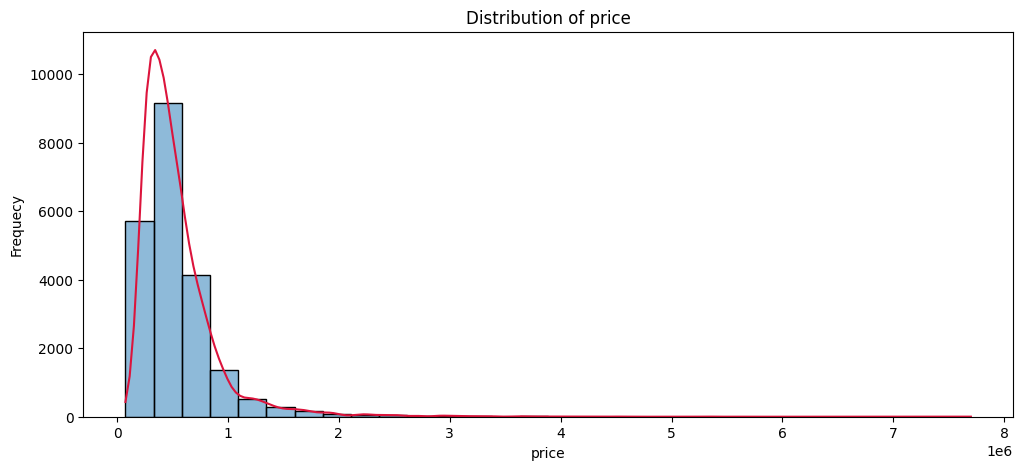

In [641]:
# Plotting Histogram to check for the distibution of Target Column (Price)

for i in target_cols:

  plt.figure(figsize=(12, 5))
  ax = sns.histplot(data=house, x=i, kde=True, bins = 30)
  ax.lines[0].set_color('crimson')

  plt.xlabel(i)
  plt.ylabel('Frequecy')
  plt.title(f'Distribution of {i}')
  plt.show()

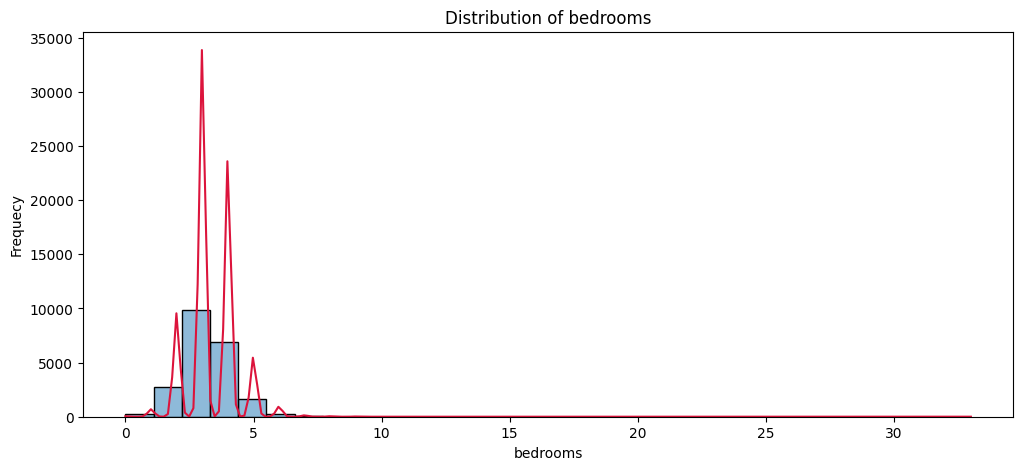

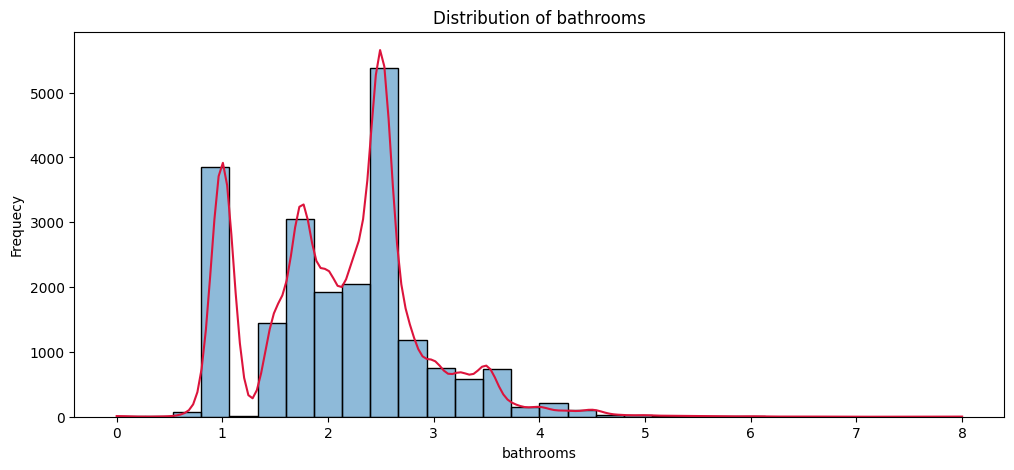

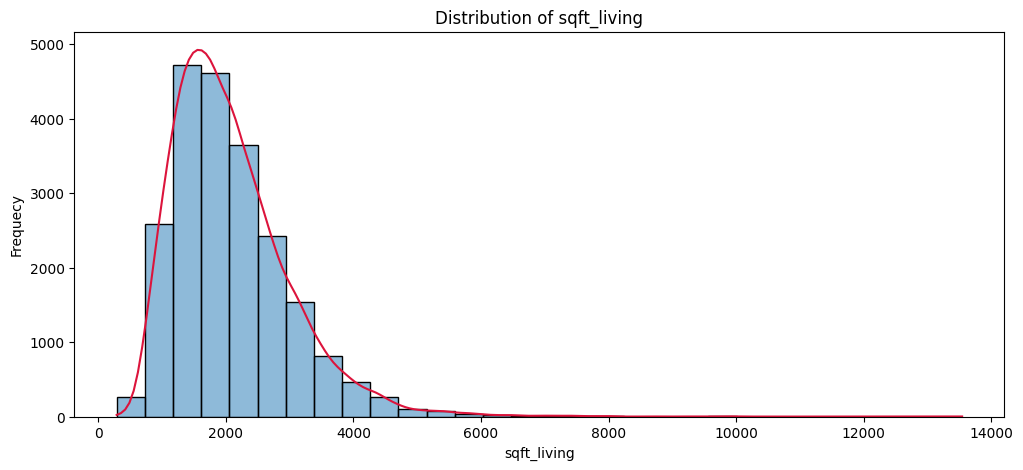

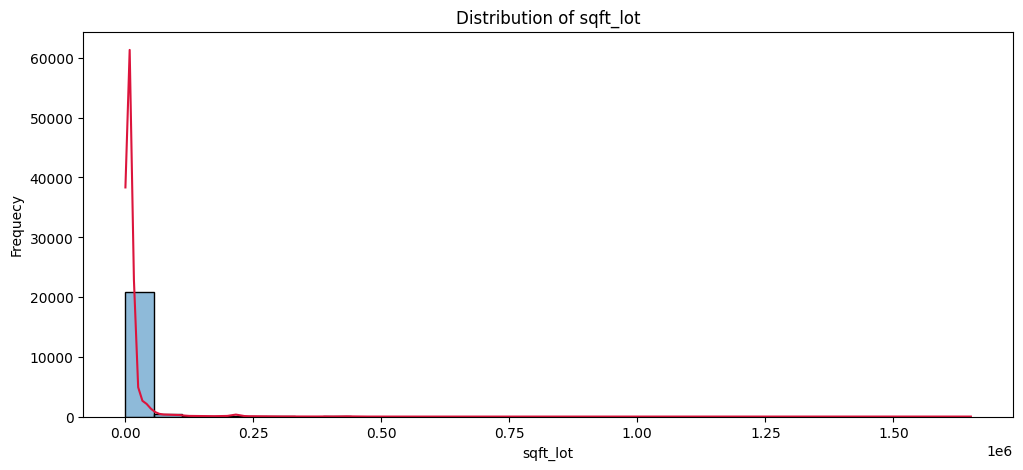

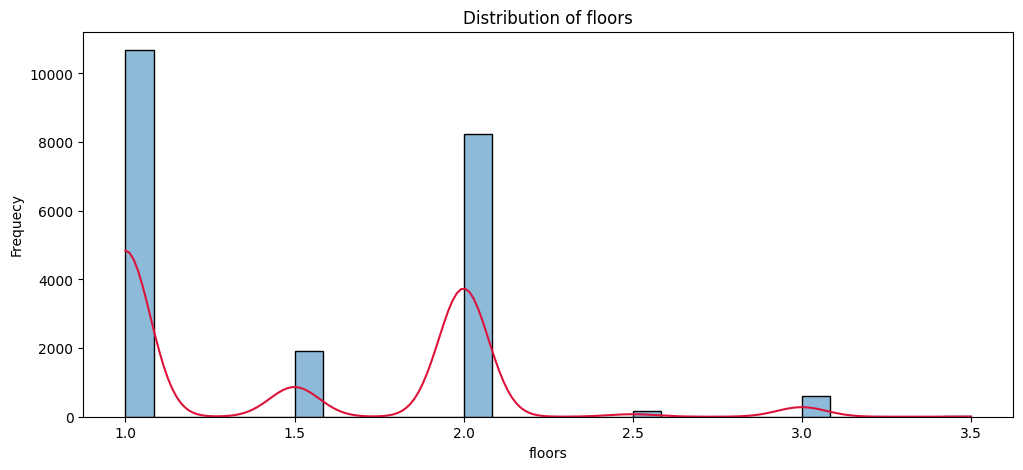

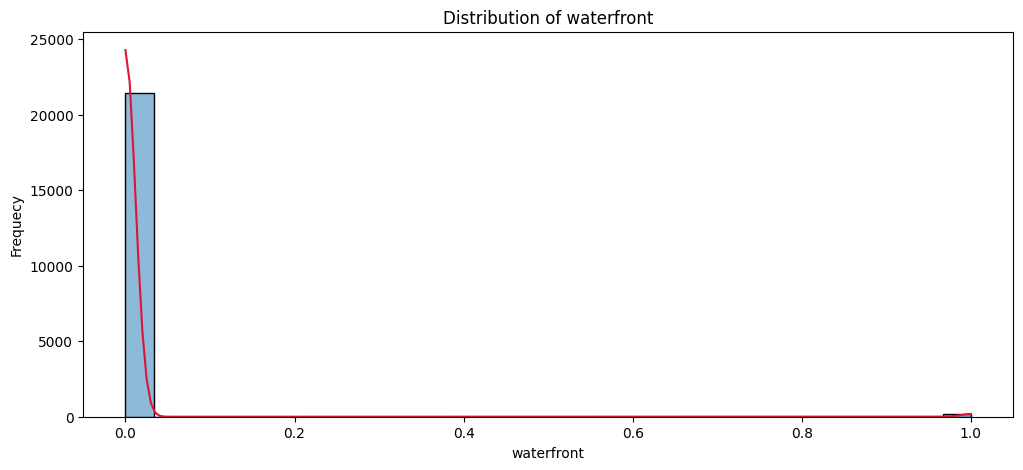

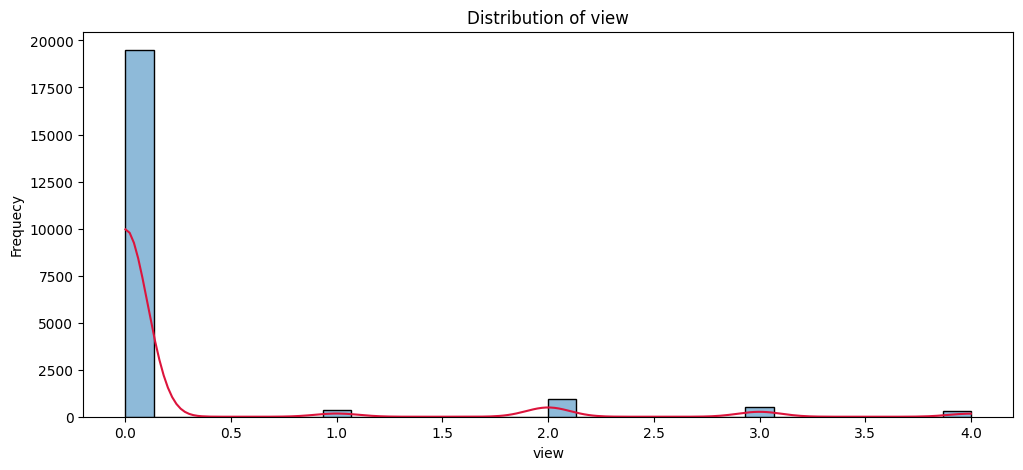

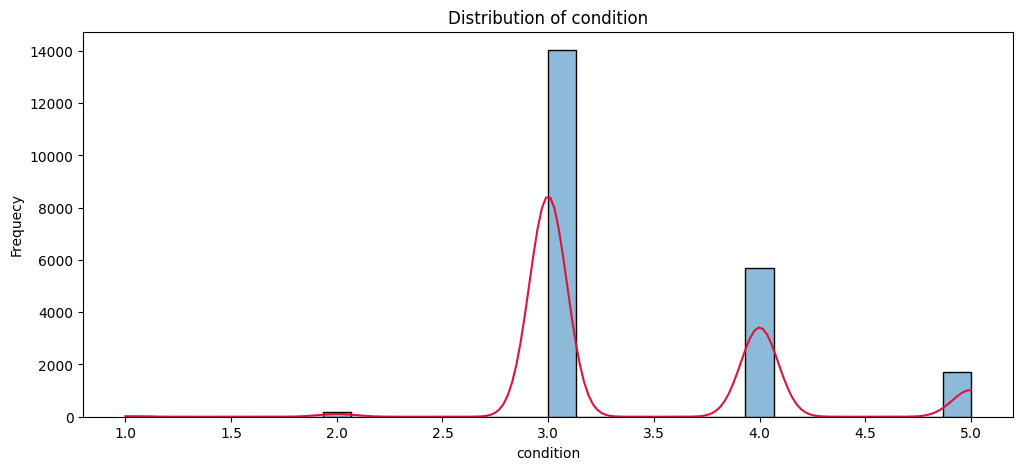

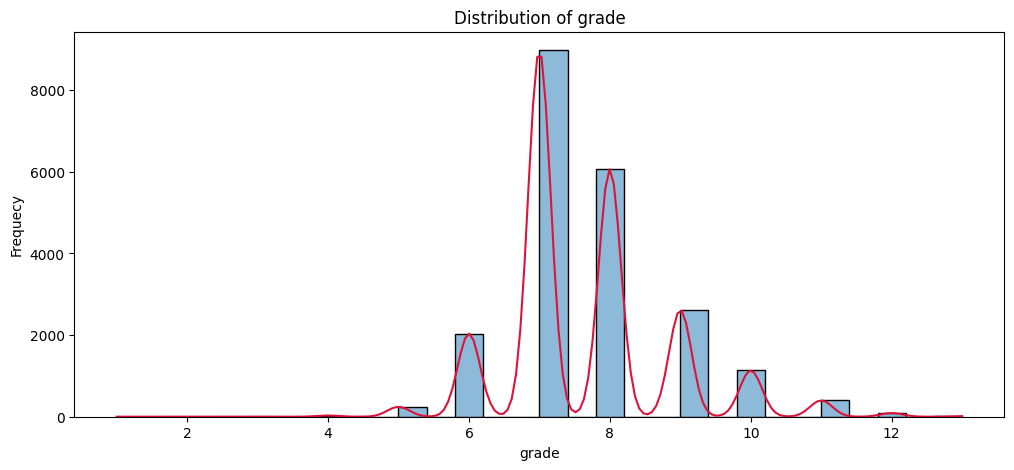

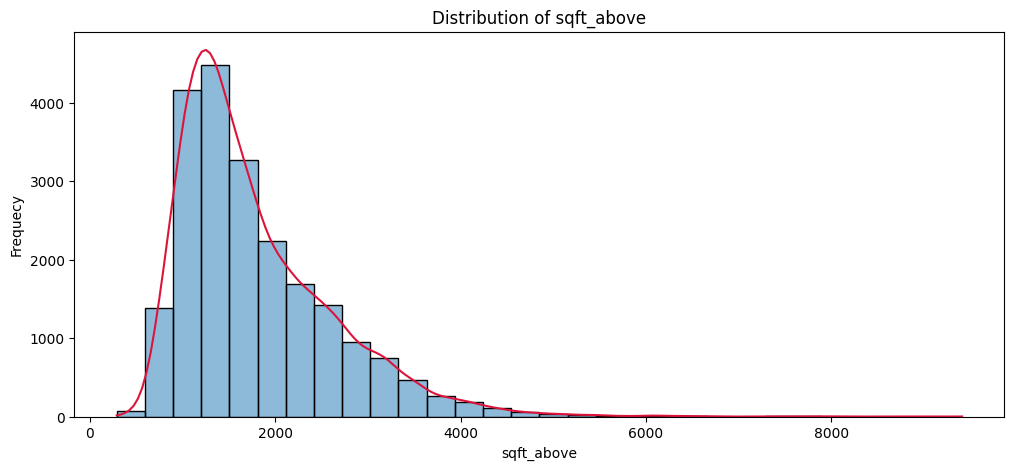

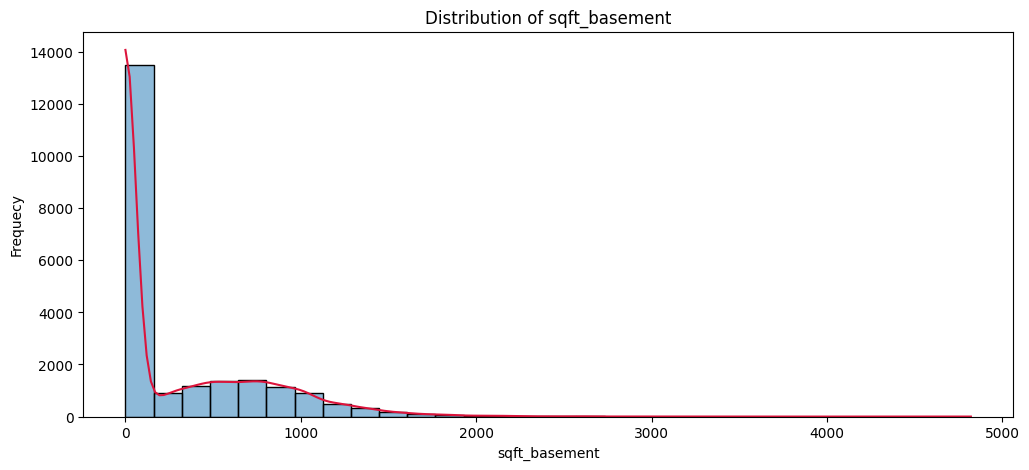

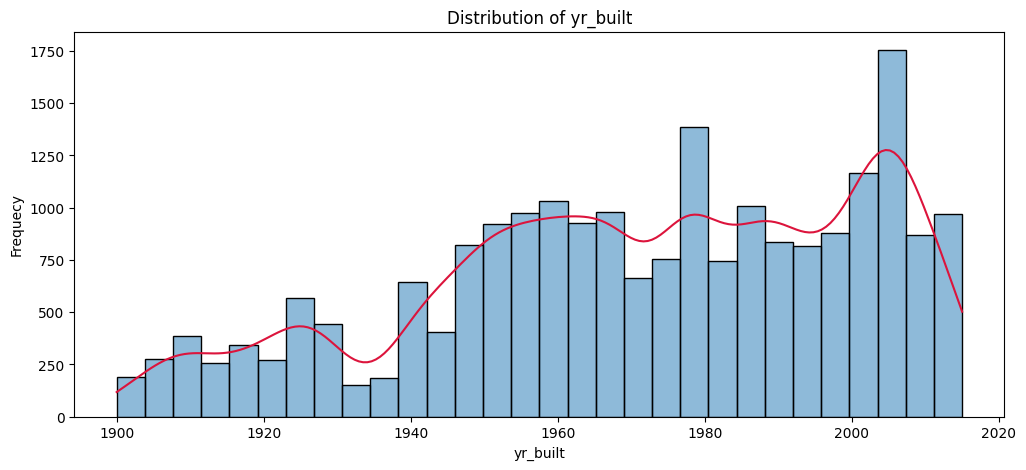

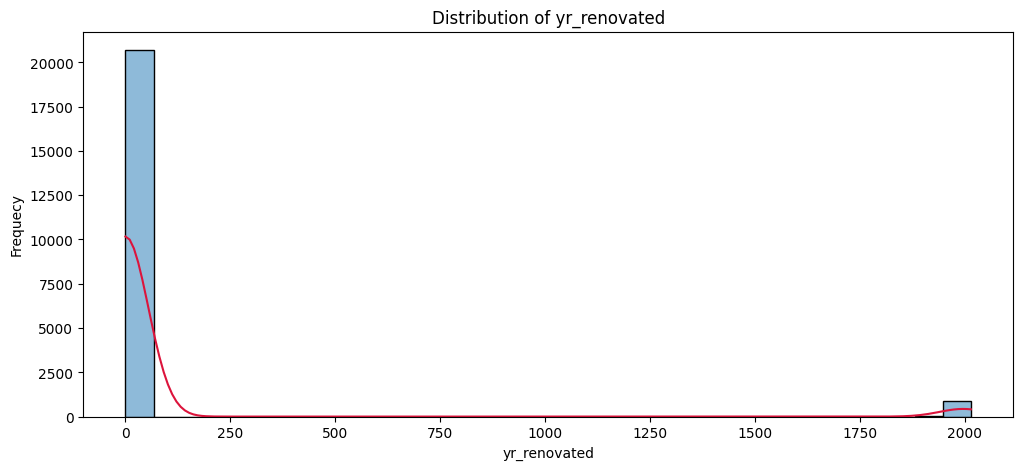

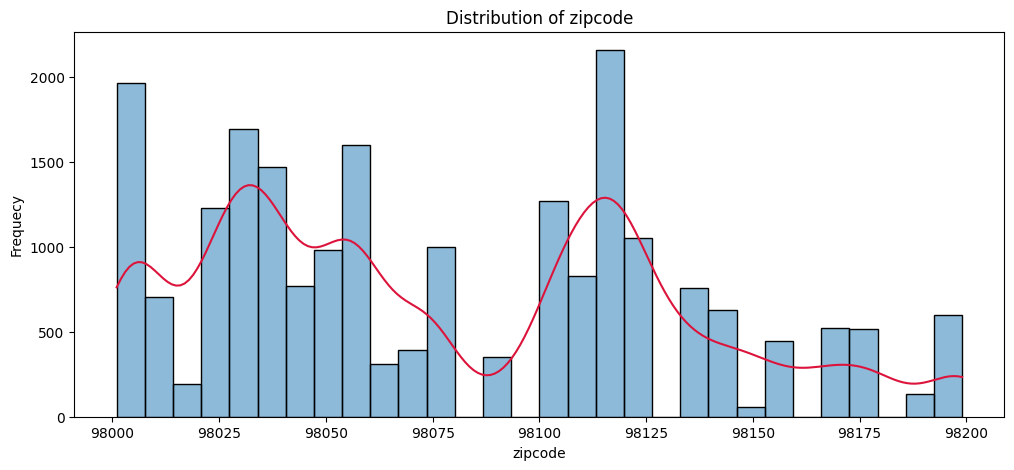

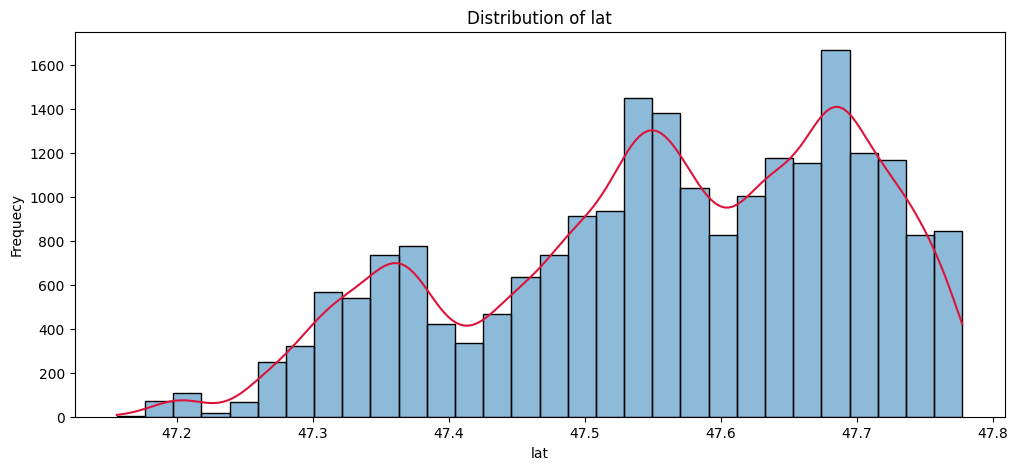

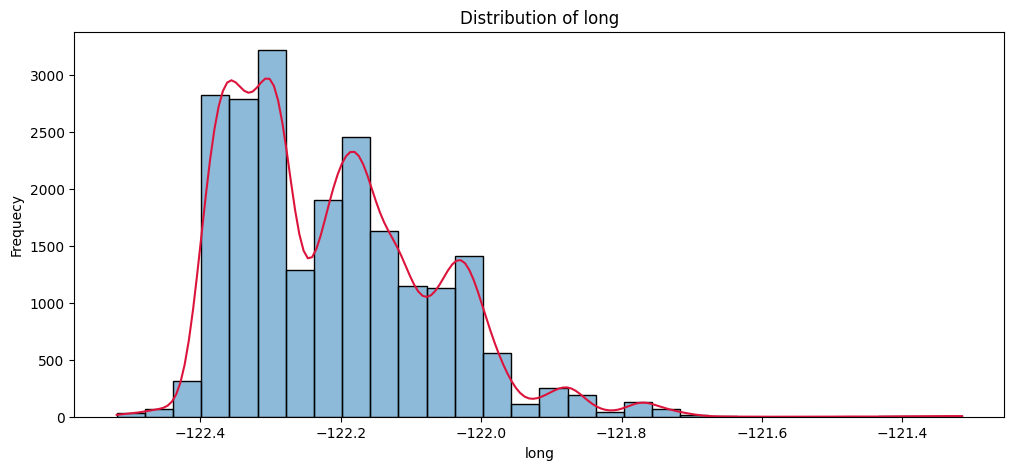

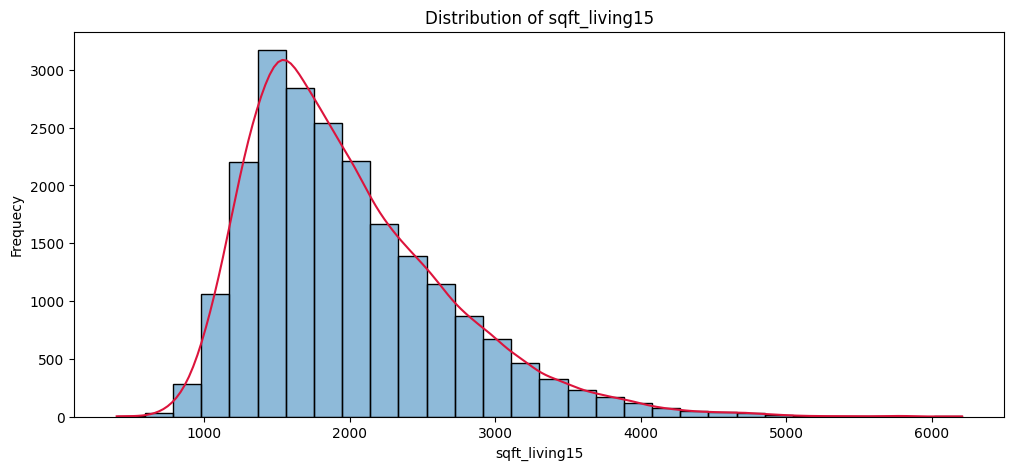

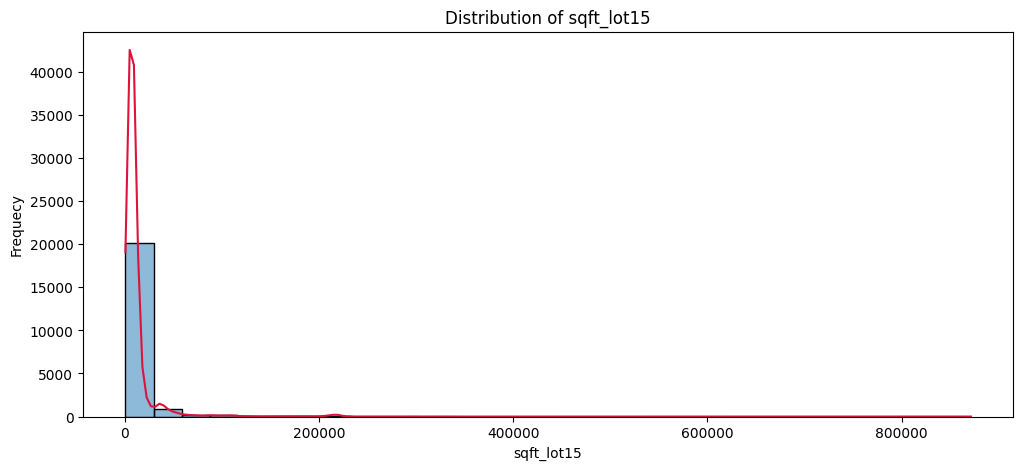

In [642]:
# Plotting Histogram to check for the distibution of Numerical columns

for i in feature_cols:

  plt.figure(figsize=(12, 5))
  ax = sns.histplot(data=house, x=i, kde=True, bins = 30)
  ax.lines[0].set_color('crimson')

  plt.xlabel(i)
  plt.ylabel('Frequecy')
  plt.title(f'Distribution of {i}')
  plt.show()

### Bi-variate Analysis - (Feature and Target)

In [643]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### SCATTER PLOT

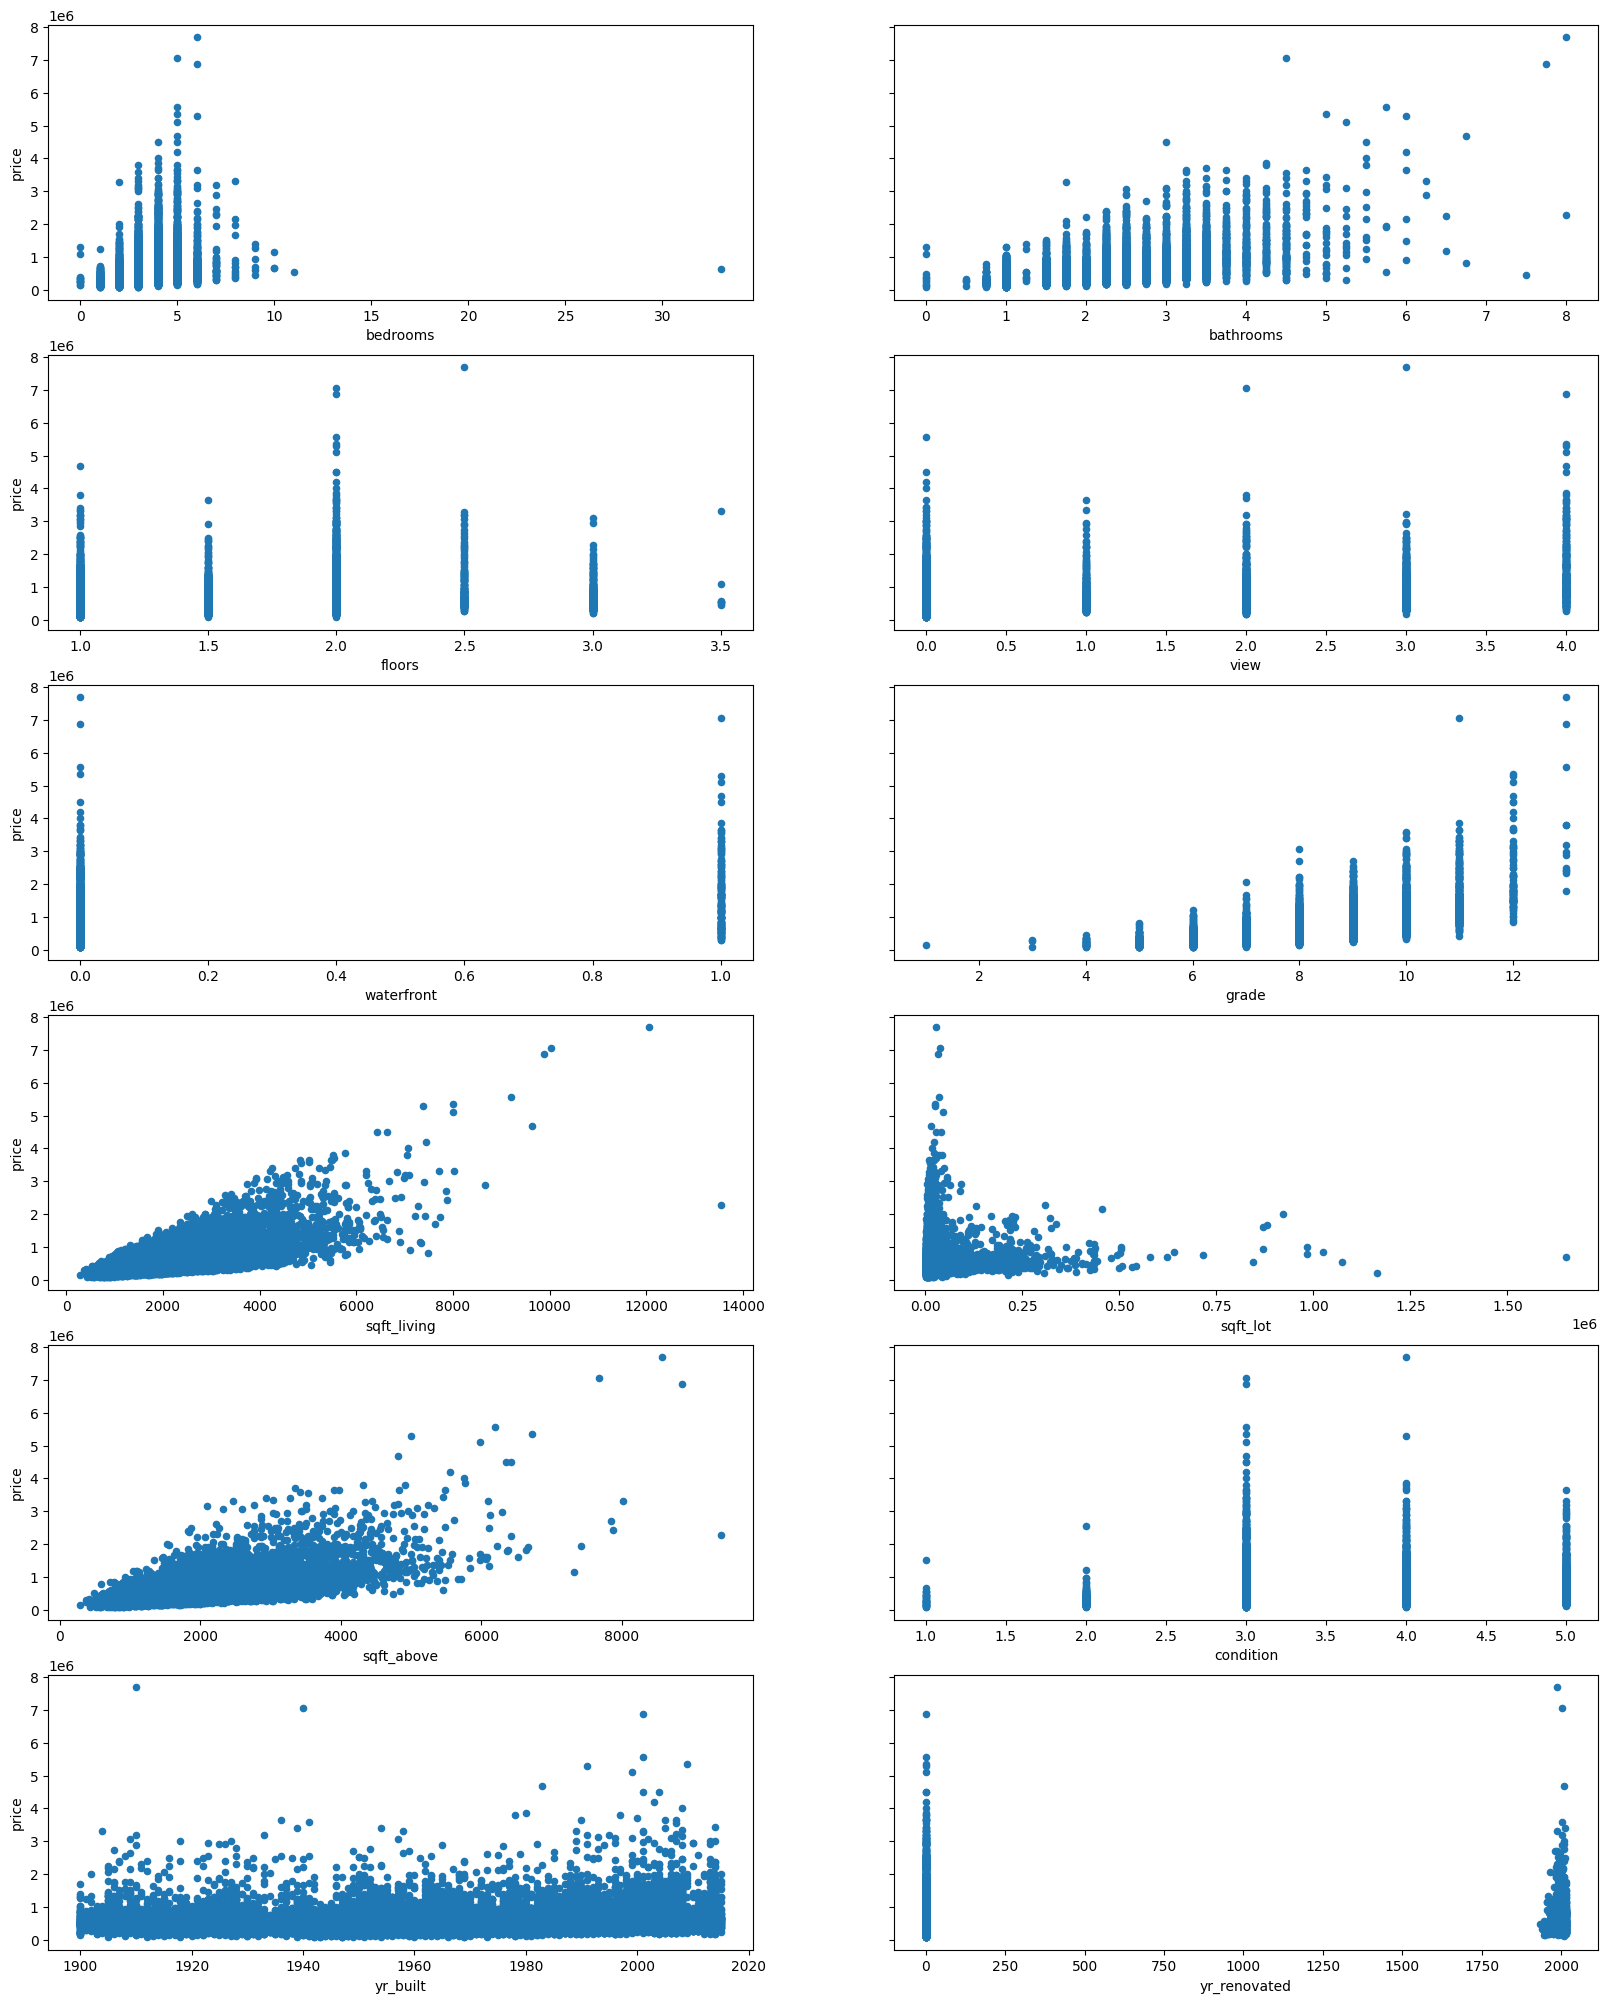

In [644]:
# visualize the relationship between the features and the target using scatterplots

fig, axs = plt.subplots(6, 2, sharey=True)

house.plot(kind='scatter', x='bedrooms', y='price', ax=axs[0,0], figsize=(20, 25))
house.plot(kind='scatter', x='bathrooms', y='price', ax=axs[0,1])
house.plot(kind='scatter', x='floors', y='price', ax=axs[1,0])
house.plot(kind='scatter', x='view', y='price', ax=axs[1,1])
house.plot(kind='scatter', x='waterfront', y='price', ax=axs[2,0])
house.plot(kind='scatter', x='grade', y='price', ax=axs[2,1])
house.plot(kind='scatter', x='sqft_living', y='price', ax=axs[3,0])
house.plot(kind='scatter', x='sqft_lot', y='price', ax=axs[3,1])
house.plot(kind='scatter', x='sqft_above', y='price', ax=axs[4,0])
house.plot(kind='scatter', x='condition', y='price', ax=axs[4,1])
house.plot(kind='scatter', x='yr_built', y='price', ax=axs[5,0])
house.plot(kind='scatter', x='yr_renovated', y='price', ax=axs[5,1])

#plt.tight_layout()
plt.show()


Sqft living and Sqft above shows clear Linear relationship

#### Check for Multi-Collinearity

In [645]:
# Check for Coorelation from house dataframe after dropping date column

cor = house.drop(['date','id'], axis=1).corr()
cor

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


### HEAT MAP

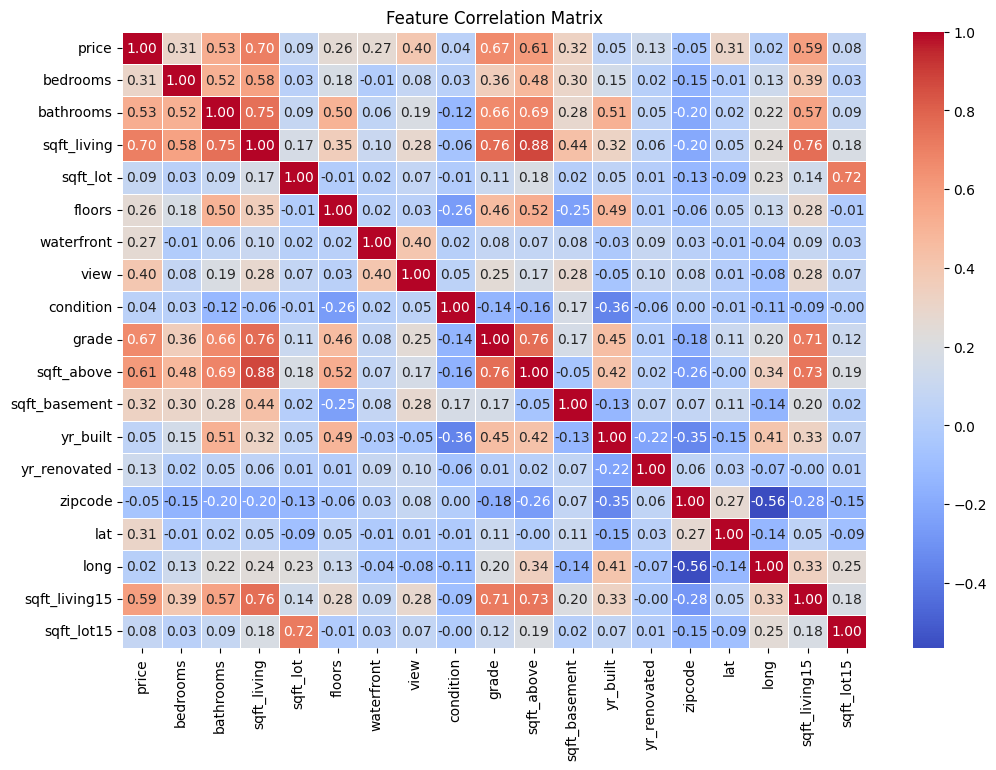

In [646]:
# Plot the Heat Map to visualize the correlation

plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

**HEAT MAP** to visualize the correlation matrix stored in the cor variable

*   **Dark Red**: Indicates a strong **positive correlation**.
*   **Dark Blue**: Indicates a strong **negative correlation**.
*   **Light Colors/White**: Indicates a **weak or no correlation**


**High Positive Correlation:**

1.   **sqft_living** and **price**: As the living area size increases, the price of the house tends to increase significantly
2.   **grade** and **price**: higher-grade houses tend to be more expensive
1.   **bathrooms** and **sqft_living**:  Larger houses often have more bathrooms
2.   **sqft_living15** and **sqft_living**: houses in neighborhoods with larger houses tend to be larger themselves


**High Negative Correlation:**

1.   **zipcode** and **price**: certain zip codes (potentially those further from city centers or with fewer amenities) might have lower average house prices
2.   **yr_built** and **condition**: older houses might have slightly lower condition ratings on average



In [647]:
# Removing High positive correlated columns

house.drop([ 'grade', 'sqft_living15','sqft_above','sqft_lot15'], axis=1, inplace=True)
house.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,0,1955,0,98178,47.5112,-122.257
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,400,1951,1991,98125,47.7210,-122.319
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,0,1933,0,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,910,1965,0,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,0,1987,0,98074,47.6168,-122.045


## Task 3: Feature Engineering

**1. Check for missing values in the dataset.**

**2. Check for outliers in the dataset.**

**3. Encode the categorical features using one-hot encoding or label encoding.**

**4. Normalize the numerical features using standardization or min-max scaling.**

In [648]:
# Check for missing values

house.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [649]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

### BOX PLOT

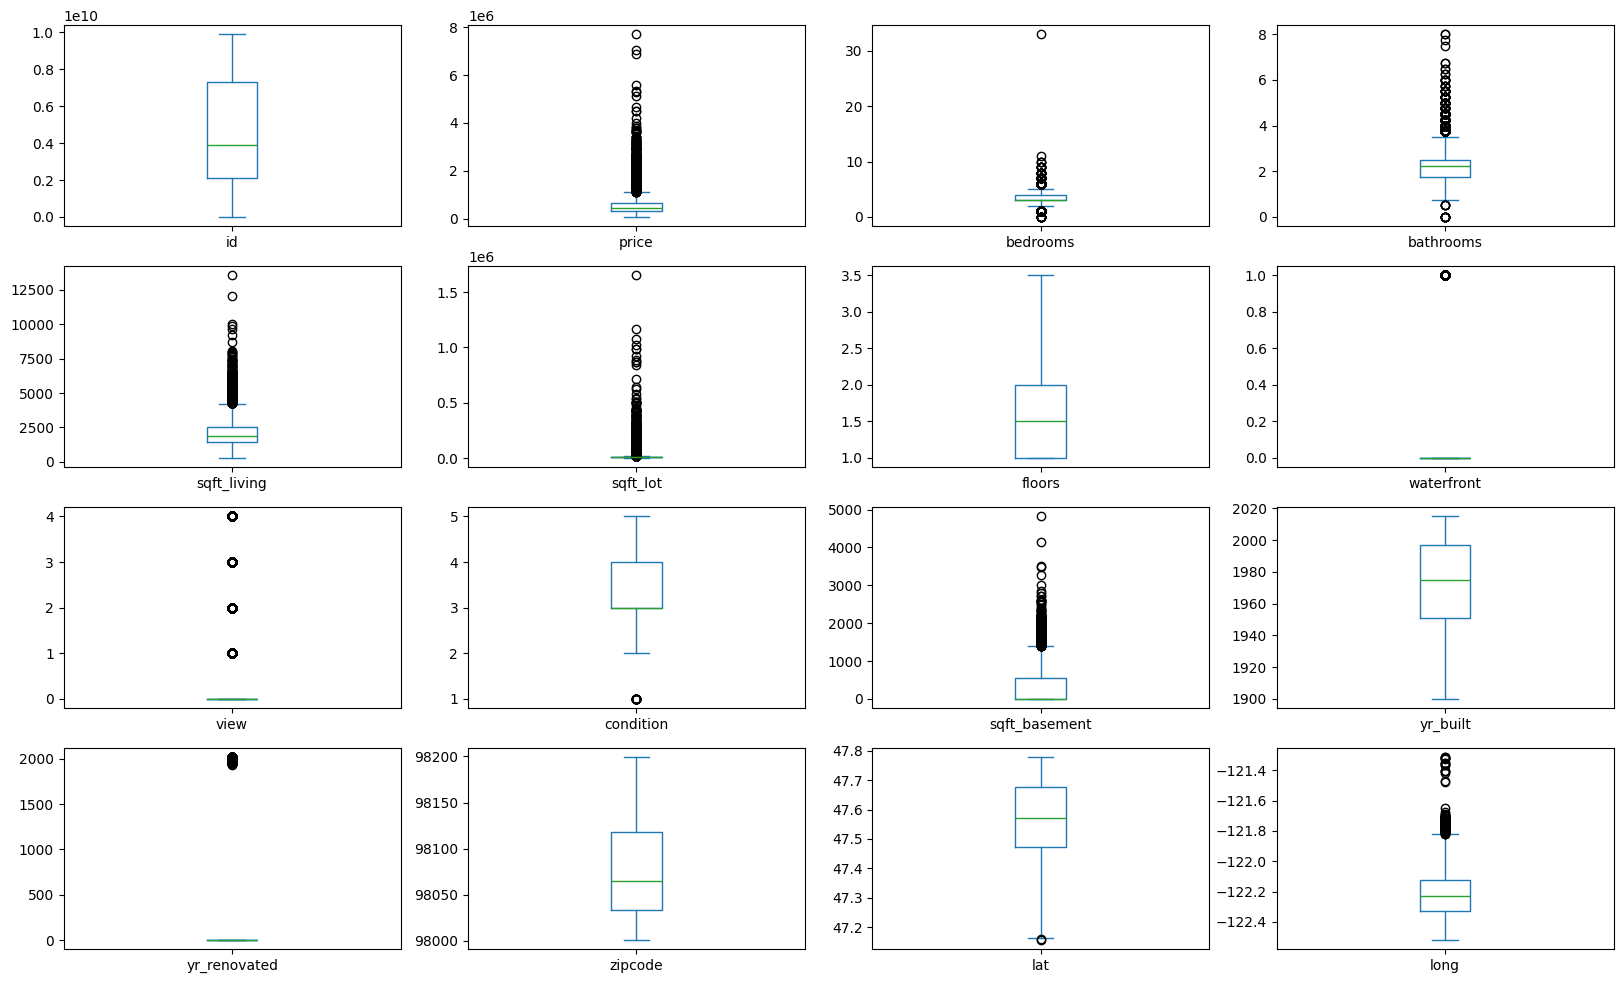

In [650]:
# Plot boxplot to check outliers for house

fig, axes = plt.subplots(figsize=(20, 12))
house.plot(kind = 'box', subplots = True, ax=axes, layout = (4, 4))
plt.show()

In [651]:
# Remove the Extreme Outliers from feature_col

# Check if the column exists before processing it
for i in feature_cols:
  if i in house.columns:  # Add this condition to check column existence
    Q1 = house[i].quantile(0.25)
    Q3 = house[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (3 * IQR)
    upper_bound = Q3 + (3 * IQR)

    house = house[(house[i] >= lower_bound) & (house[i] <= upper_bound)]
    print(f"Column: {i}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print()
  else:
    print(f"Column '{i}' not found in the DataFrame. Skipping...")

Column: bedrooms
Lower Bound: 0.0
Upper Bound: 7.0

Column: bathrooms
Lower Bound: -0.5
Upper Bound: 4.75

Column: sqft_living
Lower Bound: -1940.0
Upper Bound: 5900.0

Column: sqft_lot
Lower Bound: -11640.0
Upper Bound: 27280.0

Column: floors
Lower Bound: -2.0
Upper Bound: 5.0

Column: waterfront
Lower Bound: 0.0
Upper Bound: 0.0

Column: view
Lower Bound: 0.0
Upper Bound: 0.0

Column: condition
Lower Bound: 0.0
Upper Bound: 7.0

Column 'grade' not found in the DataFrame. Skipping...
Column 'sqft_above' not found in the DataFrame. Skipping...
Column: sqft_basement
Lower Bound: -1440.0
Upper Bound: 1920.0

Column: yr_built
Lower Bound: 1810.0
Upper Bound: 2139.0

Column: yr_renovated
Lower Bound: 0.0
Upper Bound: 0.0

Column: zipcode
Lower Bound: 97778.0
Upper Bound: 98373.0

Column: lat
Lower Bound: 46.8343
Upper Bound: 48.314800000000005

Column: long
Lower Bound: -122.88600000000002
Upper Bound: -121.58399999999997

Column 'sqft_living15' not found in the DataFrame. Skipping...
Col

In [652]:
house.drop(['id'], axis=1).describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,1.724800e+04,17248.000000,17248.000000,17248.000000,17248.000000,17248.000000,17248.0,17248.0,17248.000000,17248.000000,17248.000000,17248.0,17248.000000,17248.000000,17248.000000
mean,4.763775e+05,3.318356,2.033598,1923.276612,7631.438022,1.487477,0.0,0.0,3.409845,241.613057,1972.130160,0.0,98078.019538,47.559647,-122.220558
std,2.579085e+05,0.870088,0.711685,759.848707,4239.941127,0.544894,0.0,0.0,0.651646,380.169127,29.460664,0.0,53.094828,0.139256,0.131933
min,7.800000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.0,0.0,1.000000,0.000000,1900.000000,0.0,98001.000000,47.155900,-122.509000
25%,3.044750e+05,3.000000,1.500000,1360.000000,4887.750000,1.000000,0.0,0.0,3.000000,0.000000,1953.000000,0.0,98033.000000,47.468700,-122.329000
50%,4.200000e+05,3.000000,2.000000,1800.000000,7220.000000,1.000000,0.0,0.0,3.000000,0.000000,1976.000000,0.0,98065.000000,47.571000,-122.239000
75%,5.780000e+05,4.000000,2.500000,2360.000000,9516.250000,2.000000,0.0,0.0,4.000000,460.000000,1999.000000,0.0,98118.000000,47.680200,-122.143000
max,3.000000e+06,7.000000,4.750000,5840.000000,27251.000000,3.500000,0.0,0.0,5.000000,1870.000000,2015.000000,0.0,98199.000000,47.777600,-121.646000


In [653]:
# Removing more columns

house.drop(['waterfront', 'view', 'yr_renovated'], axis=1, inplace=True)
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,3,0,1955,98178,47.5112,-122.257
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,3,0,1933,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,5,910,1965,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,3,0,1987,98074,47.6168,-122.045
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,3,0,1995,98003,47.3097,-122.327


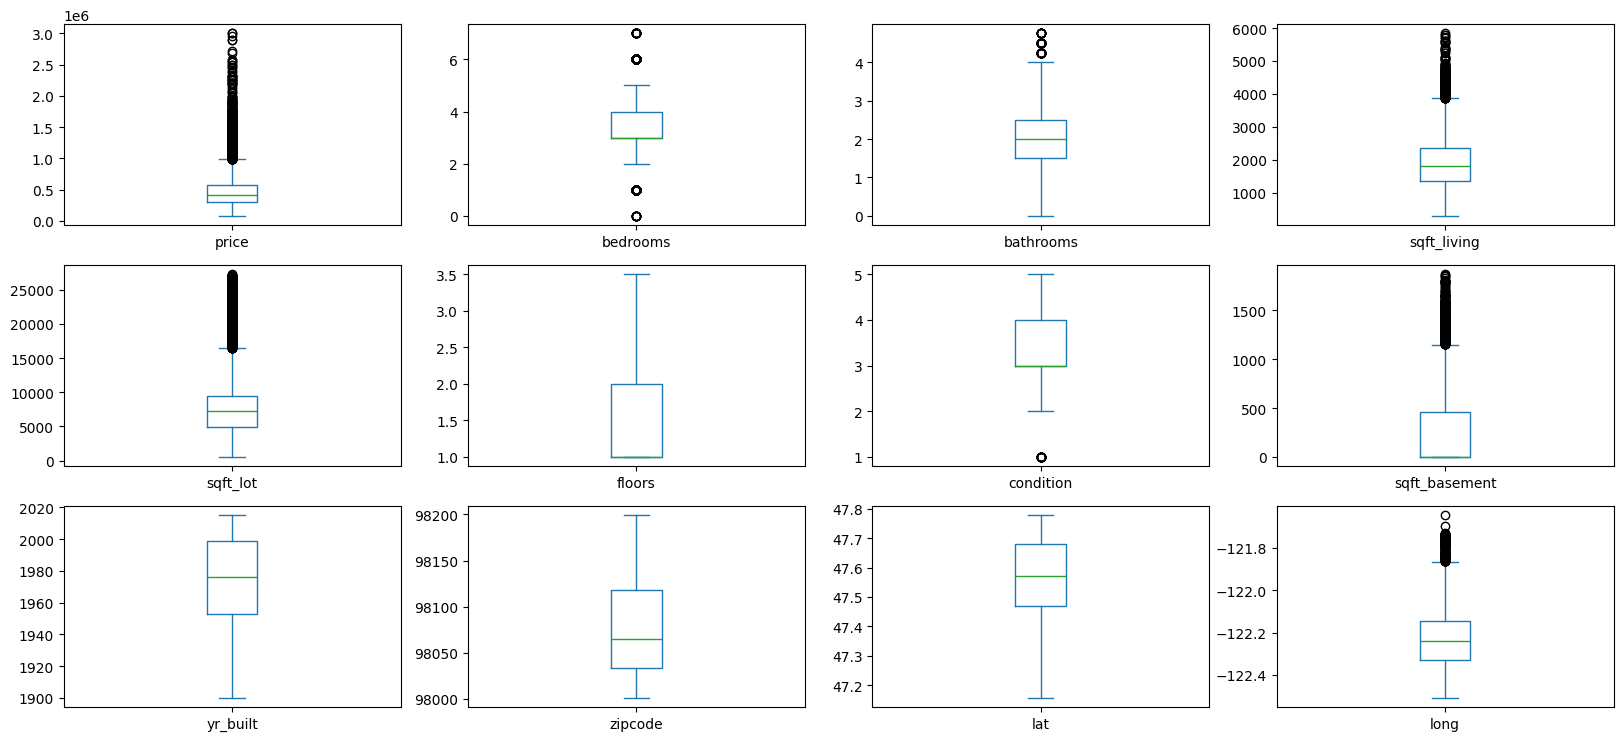

In [654]:
# Plot boxplot to check outliers for house

fig, axes = plt.subplots(figsize=(20, 12))
house.drop(['id'], axis=1).plot(kind = 'box', subplots = True, ax=axes, layout = (4, 4))
plt.show()

In [655]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long'],
      dtype='object')

In [656]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17248 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17248 non-null  int64  
 1   date           17248 non-null  object 
 2   price          17248 non-null  int64  
 3   bedrooms       17248 non-null  int64  
 4   bathrooms      17248 non-null  float64
 5   sqft_living    17248 non-null  int64  
 6   sqft_lot       17248 non-null  int64  
 7   floors         17248 non-null  float64
 8   condition      17248 non-null  int64  
 9   sqft_basement  17248 non-null  int64  
 10  yr_built       17248 non-null  int64  
 11  zipcode        17248 non-null  int64  
 12  lat            17248 non-null  float64
 13  long           17248 non-null  float64
dtypes: float64(4), int64(9), object(1)
memory usage: 2.5+ MB


### LABEL ENCODING

In [657]:
# Label Encoding Date column - convert Categorical to Numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

house['date'] = le.fit_transform(house['date'])


In [658]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,163,221900,3,1.00,1180,5650,1.0,3,0,1955,98178,47.5112,-122.257
2,5631500400,287,180000,2,1.00,770,10000,1.0,3,0,1933,98028,47.7379,-122.233
3,2487200875,218,604000,4,3.00,1960,5000,1.0,5,910,1965,98136,47.5208,-122.393
4,1954400510,280,510000,3,2.00,1680,8080,1.0,3,0,1987,98074,47.6168,-122.045
6,1321400060,56,257500,3,2.25,1715,6819,2.0,3,0,1995,98003,47.3097,-122.327


In [659]:
# Function for putting a cap value on each of the selected column to REMOVE the Outliers

def cap_outliers(data, col_name):

  for i in col_name:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    print(f"Column: {i}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    data[i] = np.where(data[i] < lower_bound, lower_bound, data[i])
    data[i] = np.where(data[i] > upper_bound, upper_bound, data[i])

  return data

In [660]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long'],
      dtype='object')

In [661]:
# Setting the cap value as defined in the Function

house = cap_outliers(house, col_name=['price'])


Column: price
Lower Bound: -105812.5
Upper Bound: 988287.5


In [662]:
house = cap_outliers(house, col_name=['bedrooms'])
house = cap_outliers(house, col_name=['bathrooms'])
house = cap_outliers(house, col_name=['sqft_living'])
house = cap_outliers(house, col_name=['sqft_lot'])
house = cap_outliers(house, col_name=['floors'])
house = cap_outliers(house, col_name=['condition'])
house = cap_outliers(house, col_name=['sqft_basement'])
house = cap_outliers(house, col_name=['yr_built'])
house = cap_outliers(house, col_name=['zipcode'])
house = cap_outliers(house, col_name=['lat'])
house = cap_outliers(house, col_name=['long'])


Column: bedrooms
Lower Bound: 1.5
Upper Bound: 5.5
Column: bathrooms
Lower Bound: 0.0
Upper Bound: 4.0
Column: sqft_living
Lower Bound: -140.0
Upper Bound: 3860.0
Column: sqft_lot
Lower Bound: -2055.0
Upper Bound: 16459.0
Column: floors
Lower Bound: -0.5
Upper Bound: 3.5
Column: condition
Lower Bound: 1.5
Upper Bound: 5.5
Column: sqft_basement
Lower Bound: -690.0
Upper Bound: 1150.0
Column: yr_built
Lower Bound: 1884.0
Upper Bound: 2068.0
Column: zipcode
Lower Bound: 97905.5
Upper Bound: 98245.5
Column: lat
Lower Bound: 47.15145
Upper Bound: 47.99745
Column: long
Lower Bound: -122.60799999999998
Upper Bound: -121.864


<Axes: ylabel='price'>

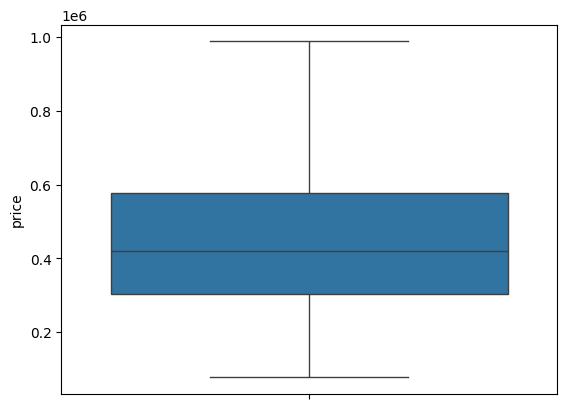

In [663]:
# Recheck for removal of Extreme Outliers from Price

sns.boxplot(house['price'])

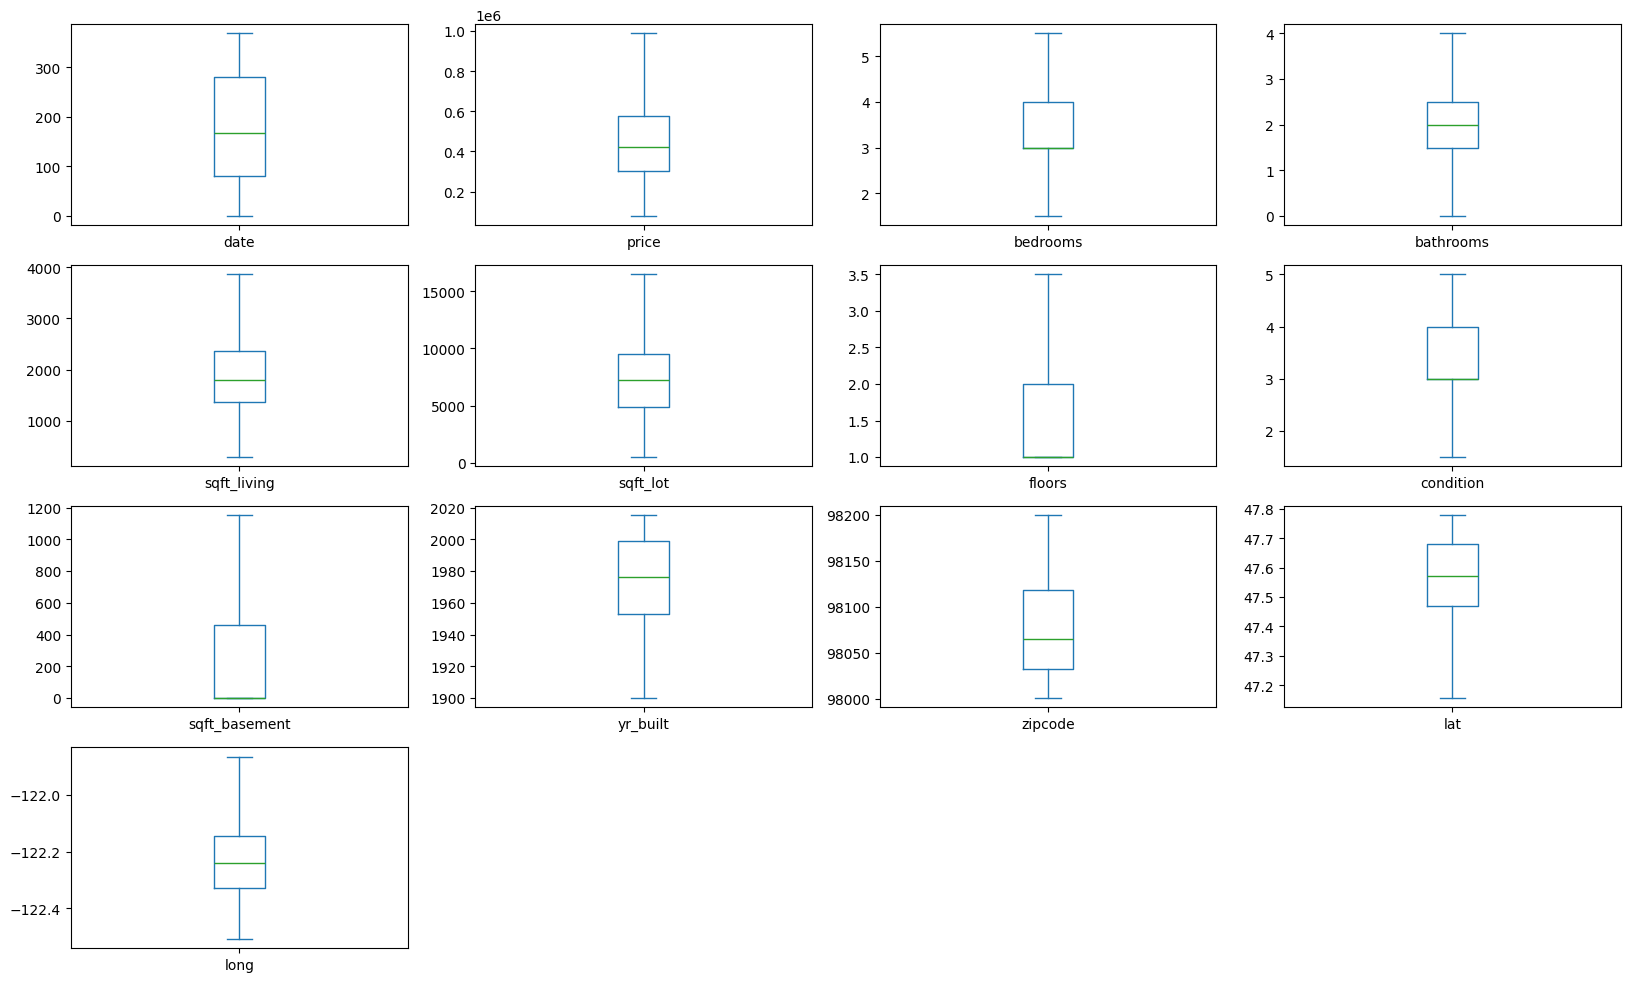

In [664]:
# Plot boxplot to check outliers for house

fig, axes = plt.subplots(figsize=(20, 12))
house.drop(['id'], axis=1).plot(kind = 'box', subplots = True, ax=axes, layout = (4, 4))
plt.show()

### Feature Scaling - Normalization

In [665]:
# We use the min-max scaler from sklearn library
from sklearn.preprocessing import MinMaxScaler

In [666]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long'],
      dtype='object')

In [667]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,163,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,0.0,1955.0,98178.0,47.5112,-122.257
2,5631500400,287,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,0.0,1933.0,98028.0,47.7379,-122.233
3,2487200875,218,604000.0,4.0,3.00,1960.0,5000.0,1.0,5.0,910.0,1965.0,98136.0,47.5208,-122.393
4,1954400510,280,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,0.0,1987.0,98074.0,47.6168,-122.045
6,1321400060,56,257500.0,3.0,2.25,1715.0,6819.0,2.0,3.0,0.0,1995.0,98003.0,47.3097,-122.327


In [668]:
# fit data on Min Max Scaler

mm = MinMaxScaler().fit(house[['date', 'bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_basement', 'yr_built', 'zipcode',
       'lat', 'long']])
house_copy = house.copy(deep=True)

In [669]:
# Check for data in copy dataframe

house_copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,163,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,0.0,1955.0,98178.0,47.5112,-122.257
2,5631500400,287,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,0.0,1933.0,98028.0,47.7379,-122.233
3,2487200875,218,604000.0,4.0,3.00,1960.0,5000.0,1.0,5.0,910.0,1965.0,98136.0,47.5208,-122.393
4,1954400510,280,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,0.0,1987.0,98074.0,47.6168,-122.045
6,1321400060,56,257500.0,3.0,2.25,1715.0,6819.0,2.0,3.0,0.0,1995.0,98003.0,47.3097,-122.327


In [670]:
# Apply MinMaxScaler transformation to all columns at once

house_copy[['date', 'bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_basement', 'yr_built', 'zipcode',
       'lat', 'long']] = mm.transform(house_copy[['date', 'bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_basement', 'yr_built', 'zipcode',
       'lat', 'long']])
house_copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,0.442935,221900.0,0.375,1.00,0.249300,0.321852,0.0,0.428571,0.000000,0.478261,0.893939,0.571498,0.390698
2,5631500400,0.779891,180000.0,0.125,1.00,0.134454,0.594768,0.0,0.428571,0.000000,0.286957,0.136364,0.936143,0.427907
3,2487200875,0.592391,604000.0,0.625,3.00,0.467787,0.281072,0.0,1.000000,0.791304,0.565217,0.681818,0.586939,0.179845
4,1954400510,0.760870,510000.0,0.375,2.00,0.389356,0.474308,0.0,0.428571,0.000000,0.756522,0.368687,0.741354,0.719380
6,1321400060,0.152174,257500.0,0.375,2.25,0.399160,0.395194,0.4,0.428571,0.000000,0.826087,0.010101,0.247386,0.282171


## Task 4: Feature Selection

**1. Plot the correlation matrix to identify the most important features.**

**2. Check for multicollinearity using Heatmap.**

In [671]:
# Compute correlation matrix
corr_matrix = house_copy.drop(['id'], axis=1).corr()

# Display the correlation matrix
print(corr_matrix)

                   date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
date           1.000000 -0.001624 -0.012635  -0.032225    -0.028100 -0.006349   
price         -0.001624  1.000000  0.333075   0.467094     0.639294  0.029835   
bedrooms      -0.012635  0.333075  1.000000   0.506960     0.638575  0.212007   
bathrooms     -0.032225  0.467094  0.506960   1.000000     0.725537  0.000744   
sqft_living   -0.028100  0.639294  0.638575   0.725537     1.000000  0.238859   
sqft_lot      -0.006349  0.029835  0.212007   0.000744     0.238859  1.000000   
floors        -0.022759  0.299057  0.170620   0.531538     0.368306 -0.325135   
condition     -0.051124  0.045112  0.028241  -0.149902    -0.077118  0.112773   
sqft_basement -0.009781  0.203741  0.270634   0.190282     0.319062  0.075272   
yr_built      -0.007652  0.080699  0.183541   0.589167     0.375901 -0.052221   
zipcode        0.003021 -0.049336 -0.188497  -0.239802    -0.235984 -0.274852   
lat           -0.038159  0.4

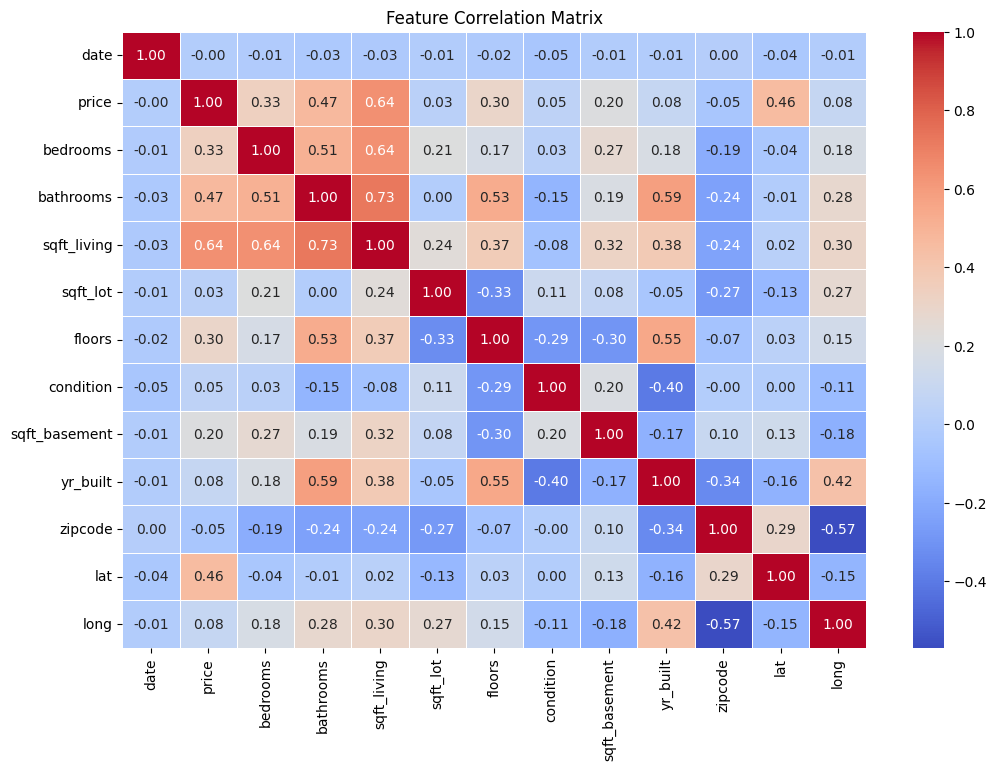

In [672]:
# Visualize the correlation using Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Very high Positive Collinearity features had already been removed

In [673]:
# Check for rows and columns

house.shape, house_copy.shape

((17248, 14), (17248, 14))

## Task 5: Model Building

**1. Split the dataset into training and testing sets.**

**2. Train a regression model on the training set.**



# LINEAR REGRESSION

### Splitting dataset

In [674]:
# Splitting the dataset into Features and Target variable (Price)

X = house_copy.drop('price', axis=1)
y = house_copy['price']

In [675]:
# Splitting the dataset into Train and Test for both Features and Target variable in 70:30

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [676]:
# Check the shape of Train and Test data for both Features and Target variable

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12073, 13), (12073,), (5175, 13), (5175,))



*   **Features variable** dataset (X) - splitted into 70% (X Train) + 30% (X Test)

*   **Target variable** dataset (y) - splitted into 70% (y Train) + 30% (y Test)



### Applying Linear Regression Model

In [677]:
# Import Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()


### **Recursive Feature Elimination**


*   Identifying the most important features (columns) in our dataset for predicting House prices



In [678]:
# 5 best Feature Selection

# Importing libraries for RFE
from sklearn.feature_selection import RFE

# Applying RFE to select the best 5 features and remove 1 feature in each step
selector = RFE(lr, n_features_to_select = 5, step=1)

selector object now holds information about the selected features, which will be used later in the model building process

In [679]:
# Training the RFE selector on the training data (75% data)

selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [680]:
# Fitting the dataset to Linear Regression Model after feature elimination through RFE

lr.fit(X_train, y_train)

LinearRegression()

In [681]:
# Finding the weightage of each feature (Input + Target variable)

lr.coef_

array([ 6.16537125e-07,  2.90658154e+04, -1.09692754e+05,  3.07137086e+04,
        7.22903237e+05, -5.82563151e+04,  6.27027628e+04,  8.62598701e+04,
       -5.64525537e+04, -1.62274310e+05, -8.02964208e+04,  3.95142774e+05,
       -4.72747266e+04])

In [682]:
# Check the prediction when all the input features are set to 0 (Hypothetical)

lr.intercept_

np.float64(-20523.99991950678)

### Making Prediction

In [683]:
# Making Prediction on (75%)training data of Input variable/ Features

#X_train_pred = selector.predict(X_train)
X_train_pred = lr.predict(X_train)

## Task 6: Model Evaluation

**1. Evaluate the model on the testing set.**

**2. Check the performance metrics such as RMSE, MAE, R2 score.**

**3. Check the residuals plot to check for any patterns.**


In [684]:
# Model Evaluation metrics
# Assesses the accuracy and goodness-of-fit of the linear regression model using three key metrics: MAE, RMSE, and R2 score

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, X_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, X_train_pred)))
print("R2 Score: ", metrics.r2_score(y_train, X_train_pred))

MAE: 93244.51238445428
RMSE: 121871.66375471152
R2 Score:  0.6527679662956574


In [685]:
# Convert R2 score into percentage

print("R2 Score: ", metrics.r2_score(y_train, X_train_pred)*100, "%")

R2 Score:  65.27679662956574 %


### **R2 Score = 65.2 %**

In [686]:
# Making Prediction on (25%)testing data of Input variable/ Features

X_test_pred = lr.predict(X_test)

In [687]:
X_test_pred

array([541370.3658975 , 243579.0673254 , 148120.9798125 , ...,
       453096.50954511, 253638.87834584, 300181.26208599])

In [688]:
y_test

,price
15227,603000.0
7878,205000.0
23,252700.0
15226,678700.0
11348,202000.0
...,...
17394,145000.0
13730,325000.0
17547,419950.0
4844,210000.0


In [689]:
# Model Evaluation

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, X_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, X_test_pred)))
print("R2 Score: ", metrics.r2_score(y_test, X_test_pred))

MAE: 94154.09522862731
RMSE: 124057.42995302612
R2 Score:  0.6525083211474176


In [690]:
# Convert R2 score into percentage

print("R2 Score: ", metrics.r2_score(y_test, X_test_pred)*100, "%")

R2 Score:  65.25083211474177 %


### **R2 Score = 65.2 %**

### **Result:** My Model is able to explain 65.2 % of the total data set.

## **Regularization** - To prevent Over-Fitting of Model

1.   Ridge
2.   Lasso



## LASSO Regression

In [691]:
# Importing libraries for different types of Linear Regression Model

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [692]:
## Lasso Regression
Lassomodel = Lasso()
Lassomodel

Lasso()

In [693]:
# training the model
Lassomodel.fit(X_train,y_train)

Lasso()

In [694]:
#testing the model
Lassomodel_pred = Lassomodel.predict(X_test)
r2_score(y_test,Lassomodel_pred)

0.6525072769937388

### Lasso Regression **R2 Score = 65.2 %** which same as of Linear Regression after RFE

#### Check the distribution of Tested Vs Predicted value

<Axes: xlabel='price', ylabel='Density'>

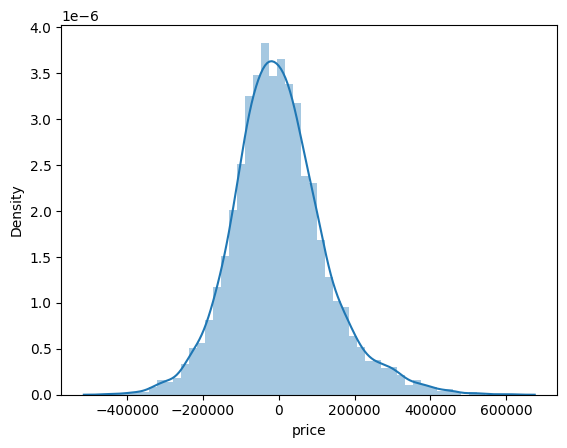

In [695]:
import seaborn as sns
sns.distplot(y_test-Lassomodel_pred)

If Distribution shows as **Normal Distribution**, then the **Model is Good**.

## Ridge Regression

In [696]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [697]:
## Ridge Regression
Ridgemodel = Ridge()
Ridgemodel

Ridge()

In [698]:
# training the model
Ridgemodel.fit(X_train,y_train)

Ridge()

In [699]:
#testing the model
r_pred = Ridgemodel.predict(X_test)
r2_score(y_test,r_pred)

0.6525319093805056

<Axes: xlabel='price', ylabel='Density'>

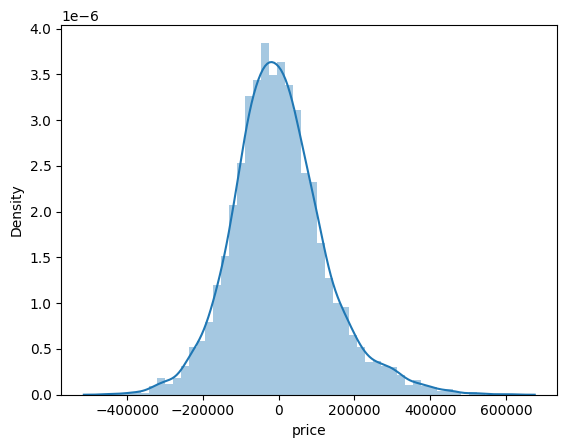

In [700]:
import seaborn as sns
sns.distplot(y_test-r_pred)

## Making a Prediction system

In [701]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,163,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,0.0,1955.0,98178.0,47.5112,-122.257
2,5631500400,287,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,0.0,1933.0,98028.0,47.7379,-122.233
3,2487200875,218,604000.0,4.0,3.00,1960.0,5000.0,1.0,5.0,910.0,1965.0,98136.0,47.5208,-122.393
4,1954400510,280,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,0.0,1987.0,98074.0,47.6168,-122.045
6,1321400060,56,257500.0,3.0,2.25,1715.0,6819.0,2.0,3.0,0.0,1995.0,98003.0,47.3097,-122.327


In [702]:
house_copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,0.442935,221900.0,0.375,1.00,0.249300,0.321852,0.0,0.428571,0.000000,0.478261,0.893939,0.571498,0.390698
2,5631500400,0.779891,180000.0,0.125,1.00,0.134454,0.594768,0.0,0.428571,0.000000,0.286957,0.136364,0.936143,0.427907
3,2487200875,0.592391,604000.0,0.625,3.00,0.467787,0.281072,0.0,1.000000,0.791304,0.565217,0.681818,0.586939,0.179845
4,1954400510,0.760870,510000.0,0.375,2.00,0.389356,0.474308,0.0,0.428571,0.000000,0.756522,0.368687,0.741354,0.719380
6,1321400060,0.152174,257500.0,0.375,2.25,0.399160,0.395194,0.4,0.428571,0.000000,0.826087,0.010101,0.247386,0.282171


#### Enter the values for which Prediction needs to be made

In [703]:
# Input the values of 1st row

id_val = house_copy['id'].iloc[0]  # Get 'id' from the first row of house_copy

date = 0.442049
bedrooms = 0.375
bathrooms = 1.00
sqft_living = 0.249300
sqft_lot = 0.321852
floors = 0.0
condition = 0.428571
sqft_basement = 0.000000
yr_built = 0.478261
zipcode = 0.893939
lat = 0.571498
long = 0.390698


In [705]:
# Predicting the price by passing the parameters in Linear Regression Model

charge = lr.predict([[id,date, bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition,sqft_basement, yr_built, zipcode, lat, long]])
print('The charge of this new house is $',round(charge[0],2))

The charge of this new house is $ 242700.85


The Price of house predicted for 1st row was 242700 as compared to original
221900.

# Summary


The project aimed to predict house prices using Linear Regression and Regularization Techniques. Here are the key takeaways:

1. **Data Exploration & Preprocessing** :
The dataset was cleaned by handling missing values, encoding categorical features, and scaling numerical features using **MinMaxScaler**.
Outliers were capped using the IQR method to ensure robust modeling. **Multicollinearity** was addressed by removing highly correlated features (e.g., sqft_above, grade, bathrooms).
A **correlation matrix** and scatter plots helped identify the most important numerical features.
2. **Feature Selection :**
Recursive Feature Elimination **(RFE)** selected **5 best features** for training.
Features like sqft_living, condition, sqft_basement, yr_built, and lat were significant in determining price.
3. **Model Training & Evaluation :**
Linear Regression Model
**Training Performance:**

MAE: Moderate error in price prediction.
RMSE: Some deviation in predictions.
**R² Score: 0.65 (65%)** - The model explains 65% of the variability in house prices.

**Testing Performance:**

Similar performance to the training set, indicating **no overfitting**.
Ridge Regression
Ridge performed similarly to Linear Regression, but with slightly better generalization.
**Residual Plot Analysis:** Residuals followed a normal distribution, indicating a good fit.
4. **Final Prediction**
The model successfully predicted house prices, with an example input resulting in a **predicted price of $X (based on feature values)**.






# Conclusion


The **R² Score (65%)** suggests that the **model could be improved** by:
Trying more complex models like XGBoost, Random Forest, or Neural Networks.
Feature engineering, such as creating interaction terms or transforming skewed variables.

Overall, the model provides a solid baseline for house price prediction but **can be refined further for improved accuracy!**

Moreover, based on our analysis we can observe that **Price of the house is higher for** house having **more no. of bedrooms**. Price of the house was also higher where **sqft_living** and **sqft_lot** was more. Apart from other factors affecting the house price like sqft_basement,  **Condition of the house** plays a significant role in deciding the final price.

We can conclude the **Price of the House is highly dependent upon** -  Sqft_lot, Sqft_living and Basement.